In [ ]:
#This dataset is about math scores for Portuguese high school students. I attempt to use 
#logistic regression to find a relationship between the students who are dating in school
#and their final grades in school; which is column G3

In [2]:
import pandas as pd


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


In [4]:
df = pd.read_csv("student-mat.csv", sep=";")
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
df.romantic.value_counts()

no     263
yes    132
Name: romantic, dtype: int64

In [10]:
pd.crosstab(df.romantic, df.G3)

G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
romantic,,,,,,,,,,,,,,,,,,
no,18,0,5,13,4,22,16,45,30,17,19,19,24,9,5,11,5,1
yes,20,1,2,2,5,10,12,11,17,14,12,8,9,7,1,1,0,0


In [11]:
pd.crosstab(df.romantic, df.G3, normalize='index')

G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
romantic,,,,,,,,,,,,,,,,,,
no,0.068441,0.000000,0.019011,0.049430,0.015209,0.083650,0.060837,0.171103,0.114068,0.064639,0.072243,0.072243,0.091255,0.034221,0.019011,0.041825,0.019011,0.003802
yes,0.151515,0.007576,0.015152,0.015152,0.037879,0.075758,0.090909,0.083333,0.128788,0.106061,0.090909,0.060606,0.068182,0.053030,0.007576,0.007576,0.000000,0.000000


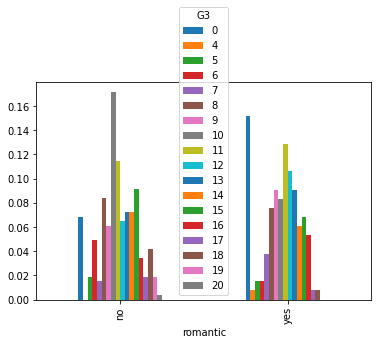

In [12]:
pd.crosstab(df.romantic, df.G3, normalize='index').plot(kind='bar')

In [13]:
df.groupby('romantic').G3.describe()

,count,mean,std,min,25%,50%,75%,max
romantic,,,,,,,,
no,263.0,10.836502,4.385946,0.0,9.0,11.0,14.0,20.0
yes,132.0,9.575758,4.856916,0.0,8.0,11.0,13.0,18.0


In [14]:
df['pass'] = df['G3'] >= 10
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,True
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,True
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,True


In [15]:
# Logistic regession demands a 0/1, not a false/true so i change
df['pass2'] = df['pass'].replace({True: 1, False: 0})
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass,pass2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,False,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,False,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,True,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,True,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,True,1


In [16]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
# Make sure it knows each of the C() ones are categories
model = smf.logit("""
    pass2 ~
        C(romantic, Treatment('yes'))
""", data=df)

results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.628837
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  pass2   No. Observations:                  395
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                0.007439
Time:                        03:36:49   Log-Likelihood:                -248.39
converged:                       True   LL-Null:                       -250.25
Covariance Type:            nonrobust   LLR p-value:                   0.05366
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.4308      0.178      2.418      0.016       0.082       0.780
C(romantic, Treatment('yes'))[T.no]     0.4329      0.224      1.937      0.053      -0.005       0.871
=======================================================================================================
"""